## Fama-French (Three factors)
$E(r_i)-r_f = \alpha + \beta_{mkt}MKT + \beta_{smb}SMB + \beta_{hml}HML$

In [1]:
import yfinance as yf 
import pandas_datareader.data as web 
import matplotlib.pyplot as plt 
import statsmodels.formula.api as smf
from pandas_datareader.famafrench import get_available_datasets

plt.style.use('bmh')

In [2]:
get_available_datasets()[:5]

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily']

In [3]:
data = yf.download('FB', period='10y', interval='1d', auto_adjust=True, progress=False)
data = data.Close.resample('M').last().iloc[:-1] # last row is not full month
data = data.pct_change(1)
data.dropna(inplace=True)
# data.index = data.index.strftime('%Y-%m')
data 

Date
2012-06-30    0.050676
2012-07-31   -0.301929
2012-08-31   -0.168125
2012-09-30    0.199336
2012-10-31   -0.025392
                ...   
2021-09-30   -0.105409
2021-10-31   -0.046613
2021-11-30    0.002751
2021-12-31    0.036646
2022-01-31   -0.068649
Freq: M, Name: Close, Length: 116, dtype: float64

In [4]:
ff_factors = web.DataReader('F-F_Research_Data_Factors', 'famafrench',
                            start=data.index[0], end=data.index[-1])[0]
ff_factors = ff_factors.div(100)
ff_factors

,Mkt-RF,SMB,HML,RF
Date,,,,
2012-06,0.0389,0.0064,0.0059,0.0000
2012-07,0.0079,-0.0272,-0.0012,0.0000
2012-08,0.0255,0.0048,0.0130,0.0001
2012-09,0.0273,0.0054,0.0158,0.0001
2012-10,-0.0176,-0.0117,0.0356,0.0001
...,...,...,...,...
2021-08,0.0290,-0.0048,-0.0013,0.0000
2021-09,-0.0437,0.0080,0.0509,0.0000
2021-10,0.0665,-0.0228,-0.0044,0.0000


In [5]:
# drop last row to match fama-french time period
data = data.iloc[:-1]
data.tail()

Date
2021-08-31    0.064777
2021-09-30   -0.105409
2021-10-31   -0.046613
2021-11-30    0.002751
2021-12-31    0.036646
Freq: M, Name: Close, dtype: float64

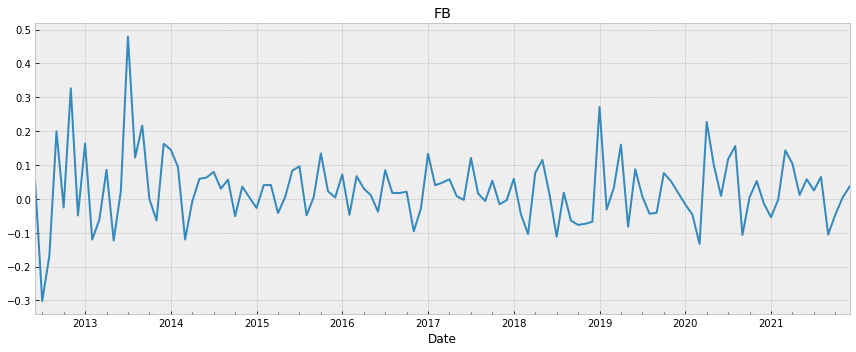

In [6]:
data.plot(figsize=(12,5), title="FB")

plt.tight_layout()
plt.show()

In [7]:
ff_factors['excess_ret'] = data.values - ff_factors.RF.values
ff_factors.rename(columns={'Mkt-RF':'MKT'}, inplace=True)
ff_factors

,MKT,SMB,HML,RF,excess_ret
Date,,,,,
2012-06,0.0389,0.0064,0.0059,0.0000,0.050676
2012-07,0.0079,-0.0272,-0.0012,0.0000,-0.301929
2012-08,0.0255,0.0048,0.0130,0.0001,-0.168225
2012-09,0.0273,0.0054,0.0158,0.0001,0.199236
2012-10,-0.0176,-0.0117,0.0356,0.0001,-0.025492
...,...,...,...,...,...
2021-08,0.0290,-0.0048,-0.0013,0.0000,0.064777
2021-09,-0.0437,0.0080,0.0509,0.0000,-0.105409
2021-10,0.0665,-0.0228,-0.0044,0.0000,-0.046613


In [8]:
ff_model = smf.ols(formula="excess_ret ~ MKT + SMB + HML", data=ff_factors).fit()
print(ff_model.summary())

                            OLS Regression Results                            
Dep. Variable:             excess_ret   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     9.046
Date:                Wed, 23 Feb 2022   Prob (F-statistic):           2.08e-05
Time:                        13:26:24   Log-Likelihood:                 113.82
No. Observations:                 115   AIC:                            -219.6
Df Residuals:                     111   BIC:                            -208.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0096      0.009      1.052      0.2